<a href="https://colab.research.google.com/github/pramanand-coder/code-portfolio/blob/master/Income_SpentAnalysis_Using_Hierarrchial_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing some basic libary

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

**Loading the dataset from the local directory**

In [5]:
from google.colab import files
u=files.upload()

Saving dataset1.csv to dataset1.csv


In [6]:
dataset=pd.read_csv("dataset1.csv")

**Summarizing the dataset**

In [7]:
print(dataset.shape)
print(dataset.head())

(200, 5)
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score
0           1    Male   19                  15              39
1           2    Male   21                  15              81
2           3  Female   20                  16               6
3           4  Female   23                  16              77
4           5  Female   31                  17              40


In [8]:
print(dataset.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score
count  200.000000  200.000000          200.000000      200.000000
mean   100.500000   38.850000           60.560000       50.200000
std     57.879185   13.969007           26.264721       25.823522
min      1.000000   18.000000           15.000000        1.000000
25%     50.750000   28.750000           41.500000       34.750000
50%    100.500000   36.000000           61.500000       50.000000
75%    150.250000   49.000000           78.000000       73.000000
max    200.000000   70.000000          137.000000       99.000000


**Label Encoding**

In [10]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
dataset["Gender"]=label_encoder.fit_transform(dataset["Gender"])

**Dendrogram Visualization**

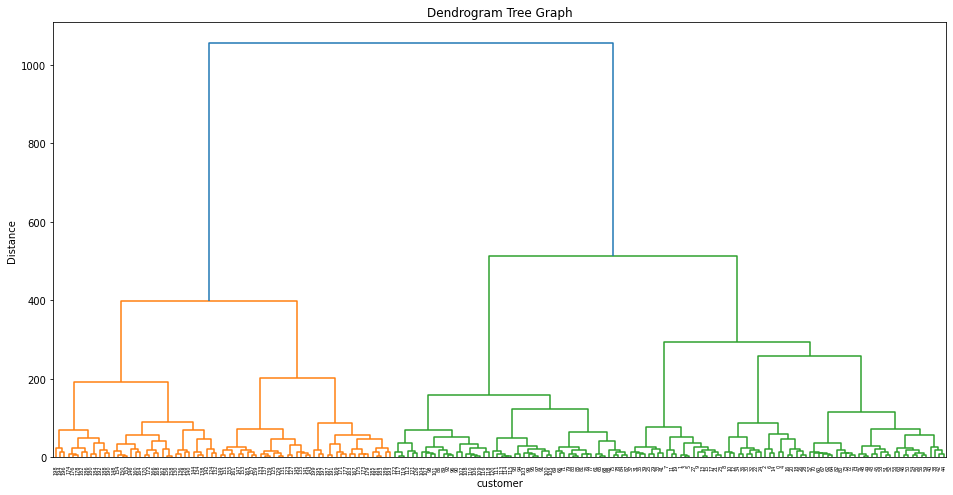

In [13]:
import scipy.cluster.hierarchy as clus
plt.figure(1,figsize=(16,8))
dendrogram=clus.dendrogram(clus.linkage(dataset,method="ward"))
plt.title("Dendrogram Tree Graph")
plt.xlabel("customer")
plt.ylabel("Distance")
plt.show()

**Fitting the Hierarchial Clustering to the dataset with n=5**

In [32]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="average")
y_means=model.fit_predict(dataset)
y_means

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

**Visualizing the result**

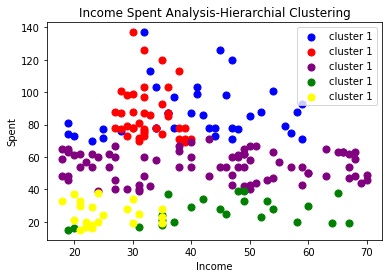

In [33]:
x=dataset.iloc[:,[2,3]].values

plt.scatter(x[y_means==0,0],x[y_means==0,1],s=50,c="blue",label="cluster 1")
plt.scatter(x[y_means==1,0],x[y_means==1,1],s=50,c="red",label="cluster 1")
plt.scatter(x[y_means==2,0],x[y_means==2,1],s=50,c="purple",label="cluster 1")
plt.scatter(x[y_means==3,0],x[y_means==3,1],s=50,c="green",label="cluster 1")
plt.scatter(x[y_means==4,0],x[y_means==4,1],s=50,c="yellow",label="cluster 1")
plt.title("Income Spent Analysis-Hierarchial Clustering")
plt.xlabel("Income")
plt.ylabel("Spent")
plt.legend()
plt.show()